<a href="https://colab.research.google.com/github/bdi2357/DataAnalyticsWithChatGPT/blob/main/EDA/TelcoCustomerChurnEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/ChatGPT_ADA_playground/TelcoCustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv .

In [ ]:
!ls

drive  sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [ ]:
import pandas as pd

#file_path = '/path/to/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)
data.head()  # Shows the first 5 rows
data.tail()  # Shows the last 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_tenure = detect_outliers(data, 'tenure')
outliers_monthly_charges = detect_outliers(data, 'MonthlyCharges')
outliers_total_charges = detect_outliers(data, 'TotalCharges')

data['TotalCharges'].isnull().sum()  # Check for entries that couldn't be converted to numeric


11

In [ ]:
churn_counts = data['Churn'].value_counts(normalize=True)
positive_churn_ratio = churn_counts.get('Yes', 0)
positive_churn_ratio

In [ ]:
# Convert 'TotalCharges' to numeric, if there's an error coerce it to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for duplicates in the dataset
duplicate_rows = data.duplicated().sum()

# Check for consistency of categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_consistency = {column: data[column].value_counts() for column in categorical_columns if data[column].nunique() < 15}

# Validate data entries according to domain knowledge
# Check binary columns for values other than 0 or 1
invalid_senior_citizen = data[~data['SeniorCitizen'].isin([0, 1])]

# Check for negative values in 'tenure' and 'MonthlyCharges'
invalid_tenure = data[data['tenure'] < 0]
invalid_monthly_charges = data[data['MonthlyCharges'] < 0]

# Check for negative values or inconsistencies in 'TotalCharges'
invalid_total_charges = data[data['TotalCharges'] < 0]

# Check for invalid values in categorical columns
expected_values = {
    'gender': ['Male', 'Female'],
    'Partner': ['Yes', 'No'],
    'Dependents': ['Yes', 'No'],
    'PhoneService': ['Yes', 'No'],
    'PaperlessBilling': ['Yes', 'No'],
    'Churn': ['Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
}

invalid_categorical_entries = {column: data[~data[column].isin(values)] for column, values in expected_values.items()}

# Summarize invalid entries
invalid_entries_summary = {
    'invalid_senior_citizen': invalid_senior_citizen.shape[0],
    'invalid_tenure': invalid_tenure.shape[0],
    'invalid_monthly_charges': invalid_monthly_charges.shape[0],
    'invalid_total_charges': invalid_total_charges.shape[0],
    'invalid_categorical_entries': {col: len(entries) for col, entries in invalid_categorical_entries.items() if len(entries) > 0}
}
invalid_entries_summary

{'invalid_senior_citizen': 0,
 'invalid_tenure': 0,
 'invalid_monthly_charges': 0,
 'invalid_total_charges': 0,
 'invalid_categorical_entries': {}}

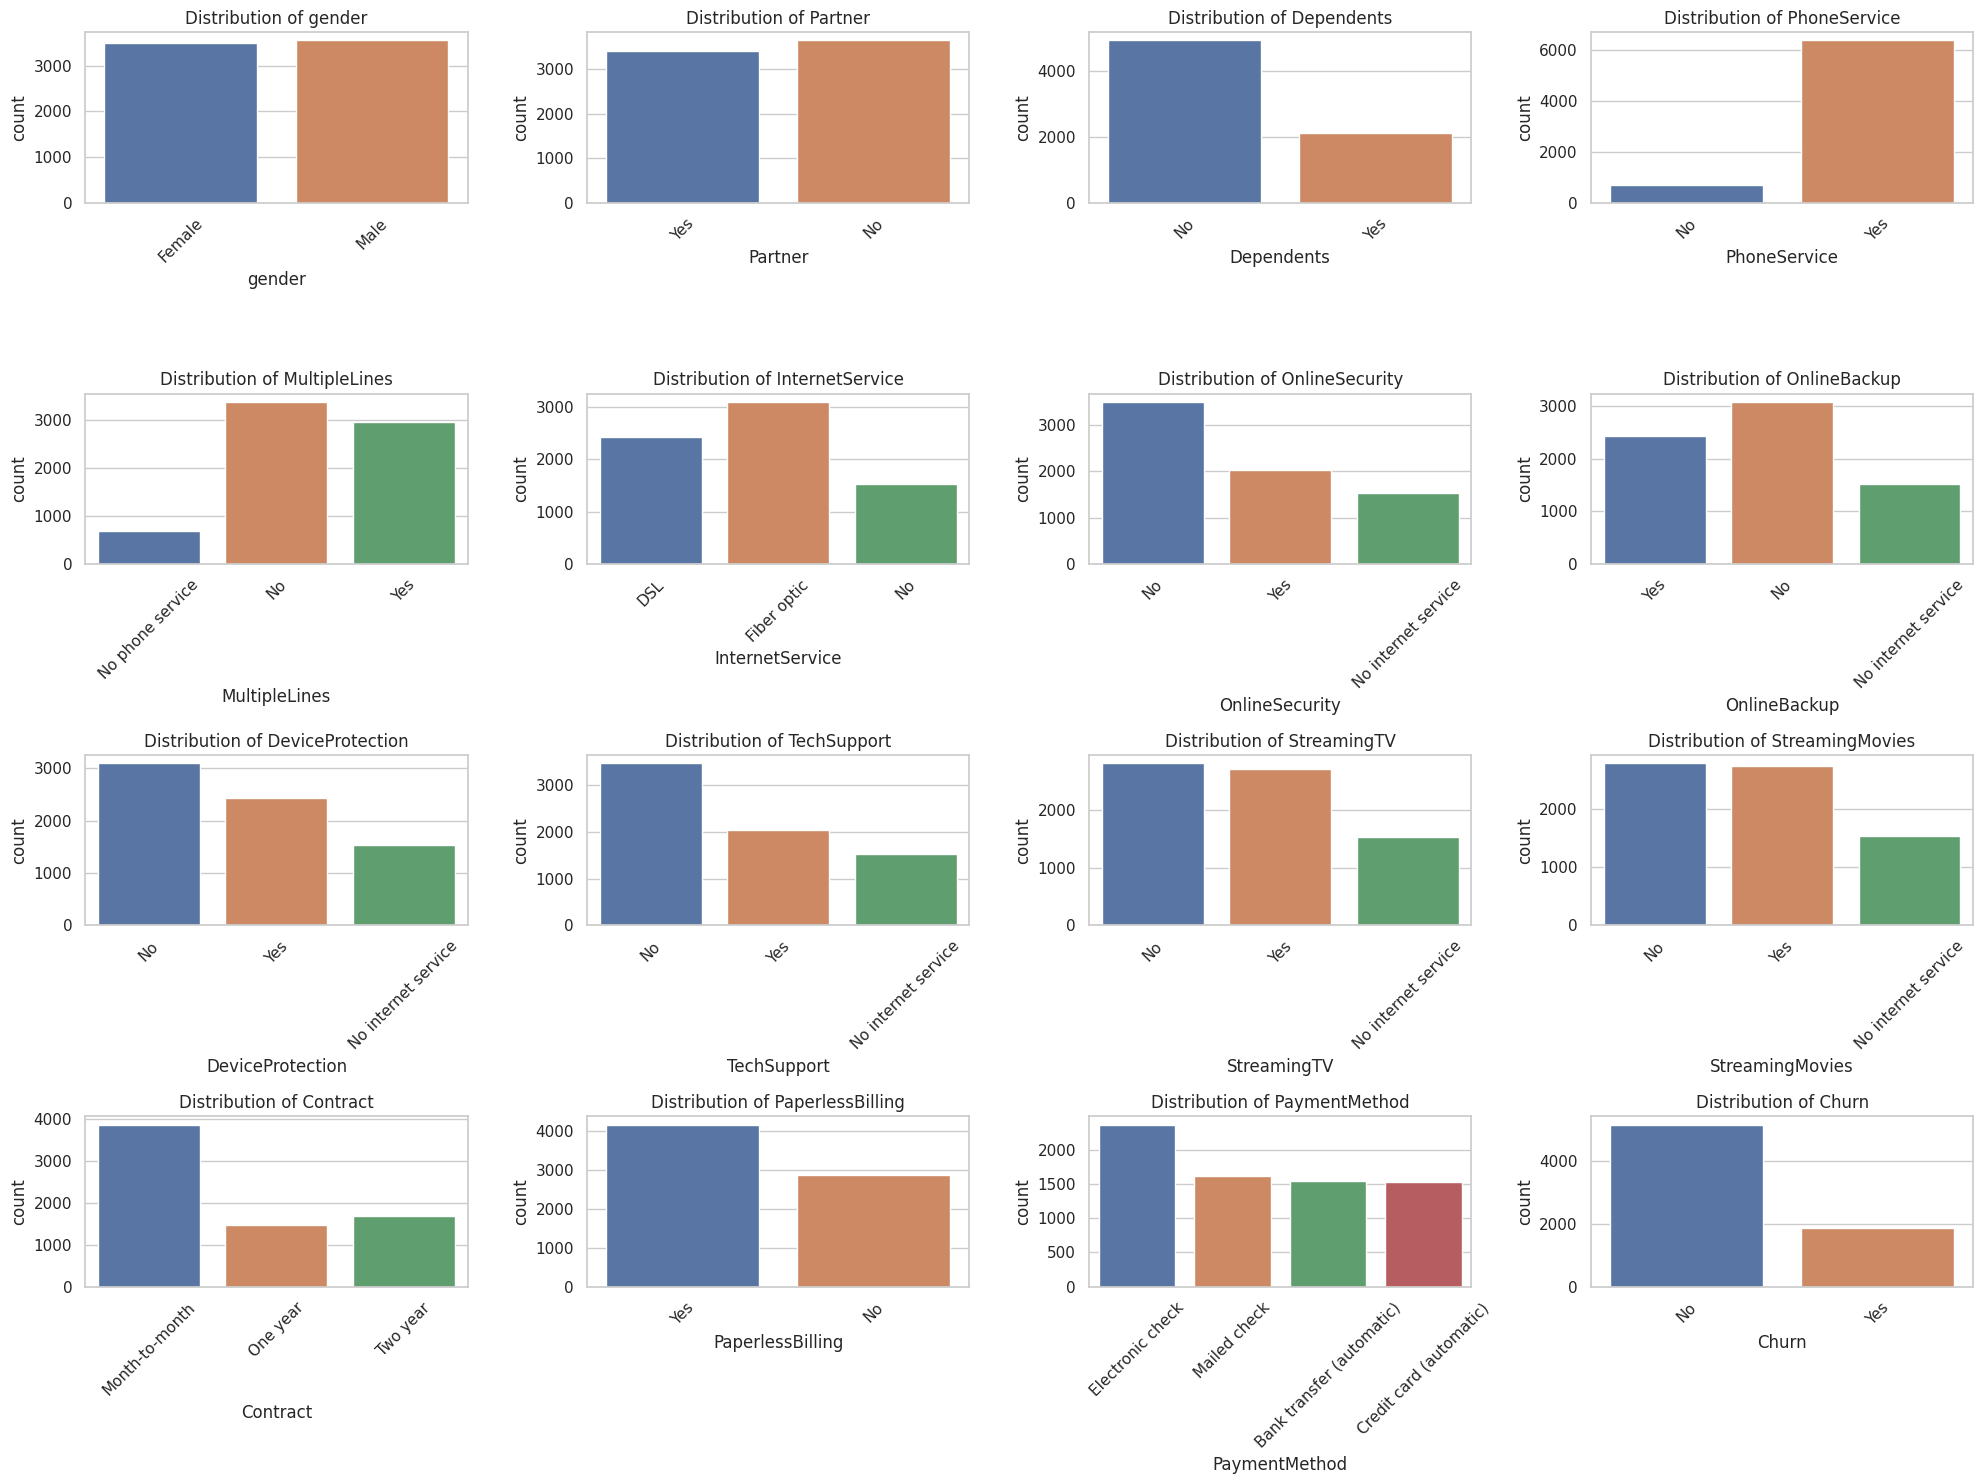

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Categorical columns with less than 15 unique values (already identified previously)
categorical_columns = [column for column in data.columns if data[column].nunique() < 15 and data[column].dtype == 'object']

# Plotting the distributions of categorical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  # Create subplots for each categorical column
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

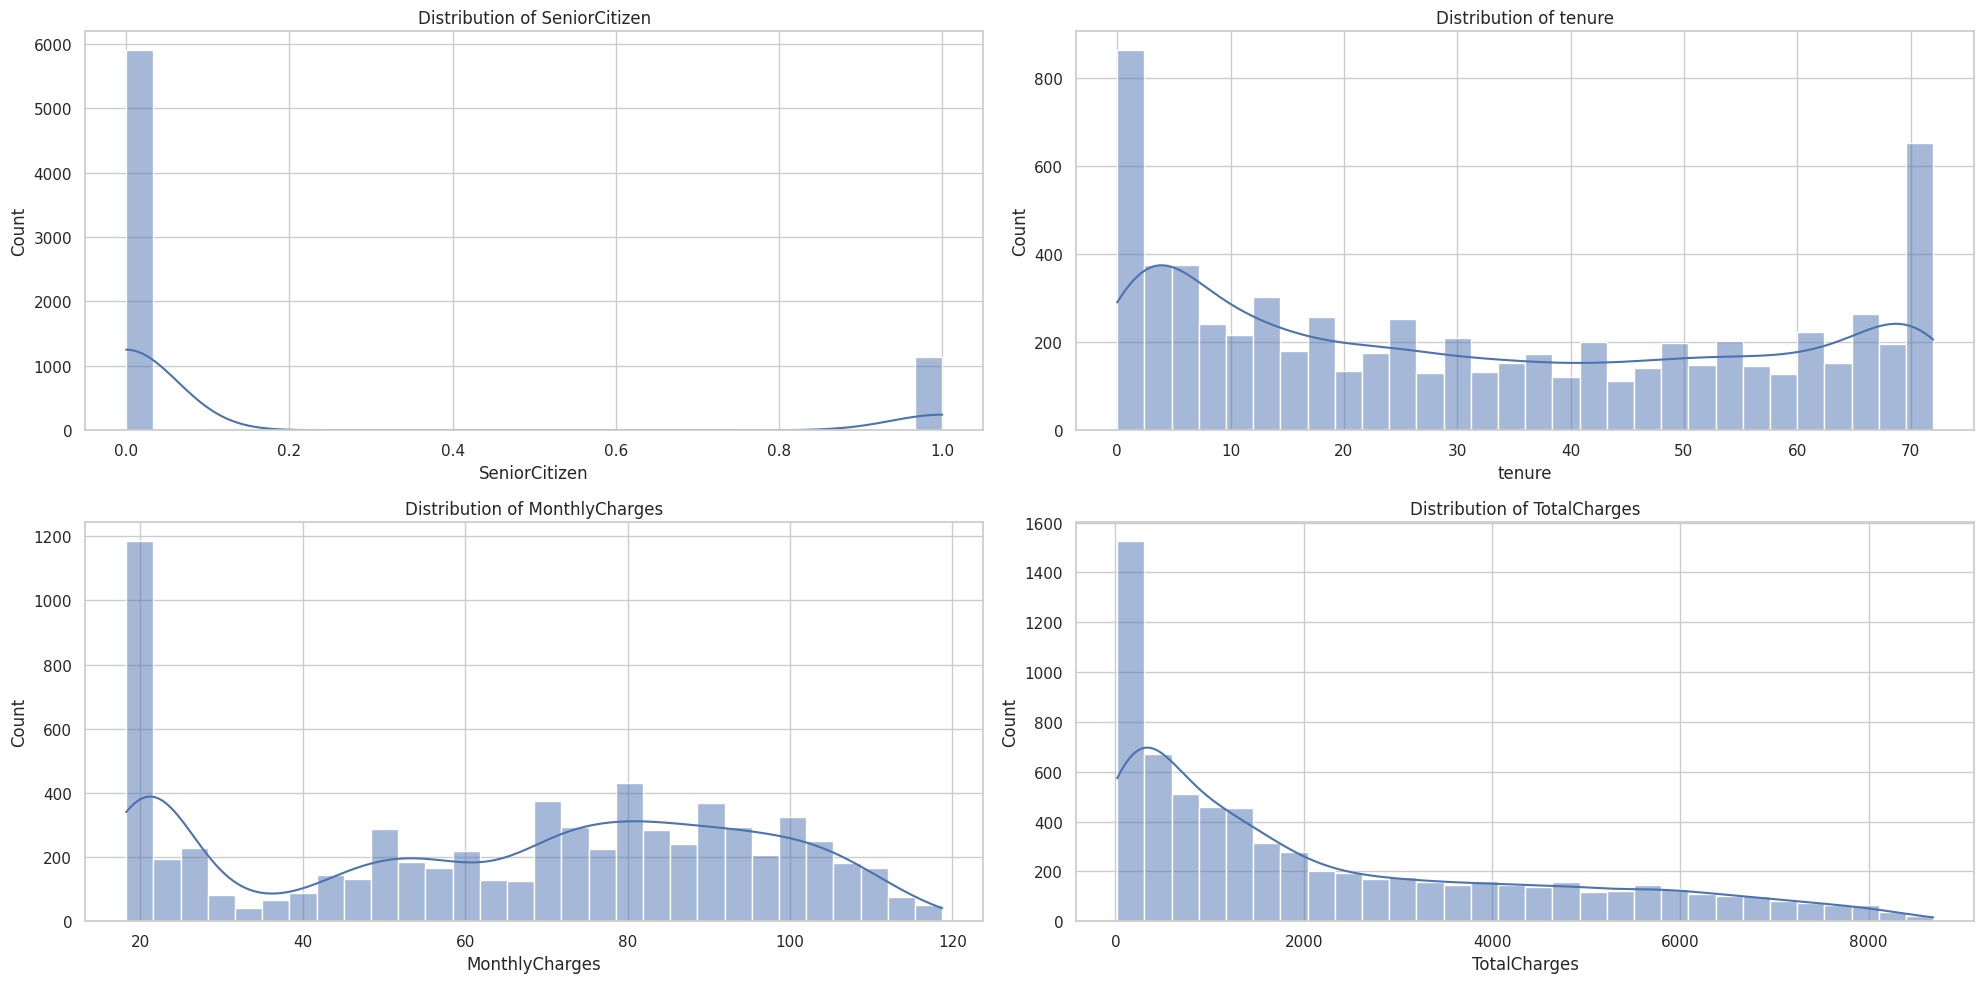

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Select numerical columns
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']  # Assuming these are the numerical columns

# Plotting histograms for numerical columns
plt.figure(figsize=(20, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Create subplots for each numerical column
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


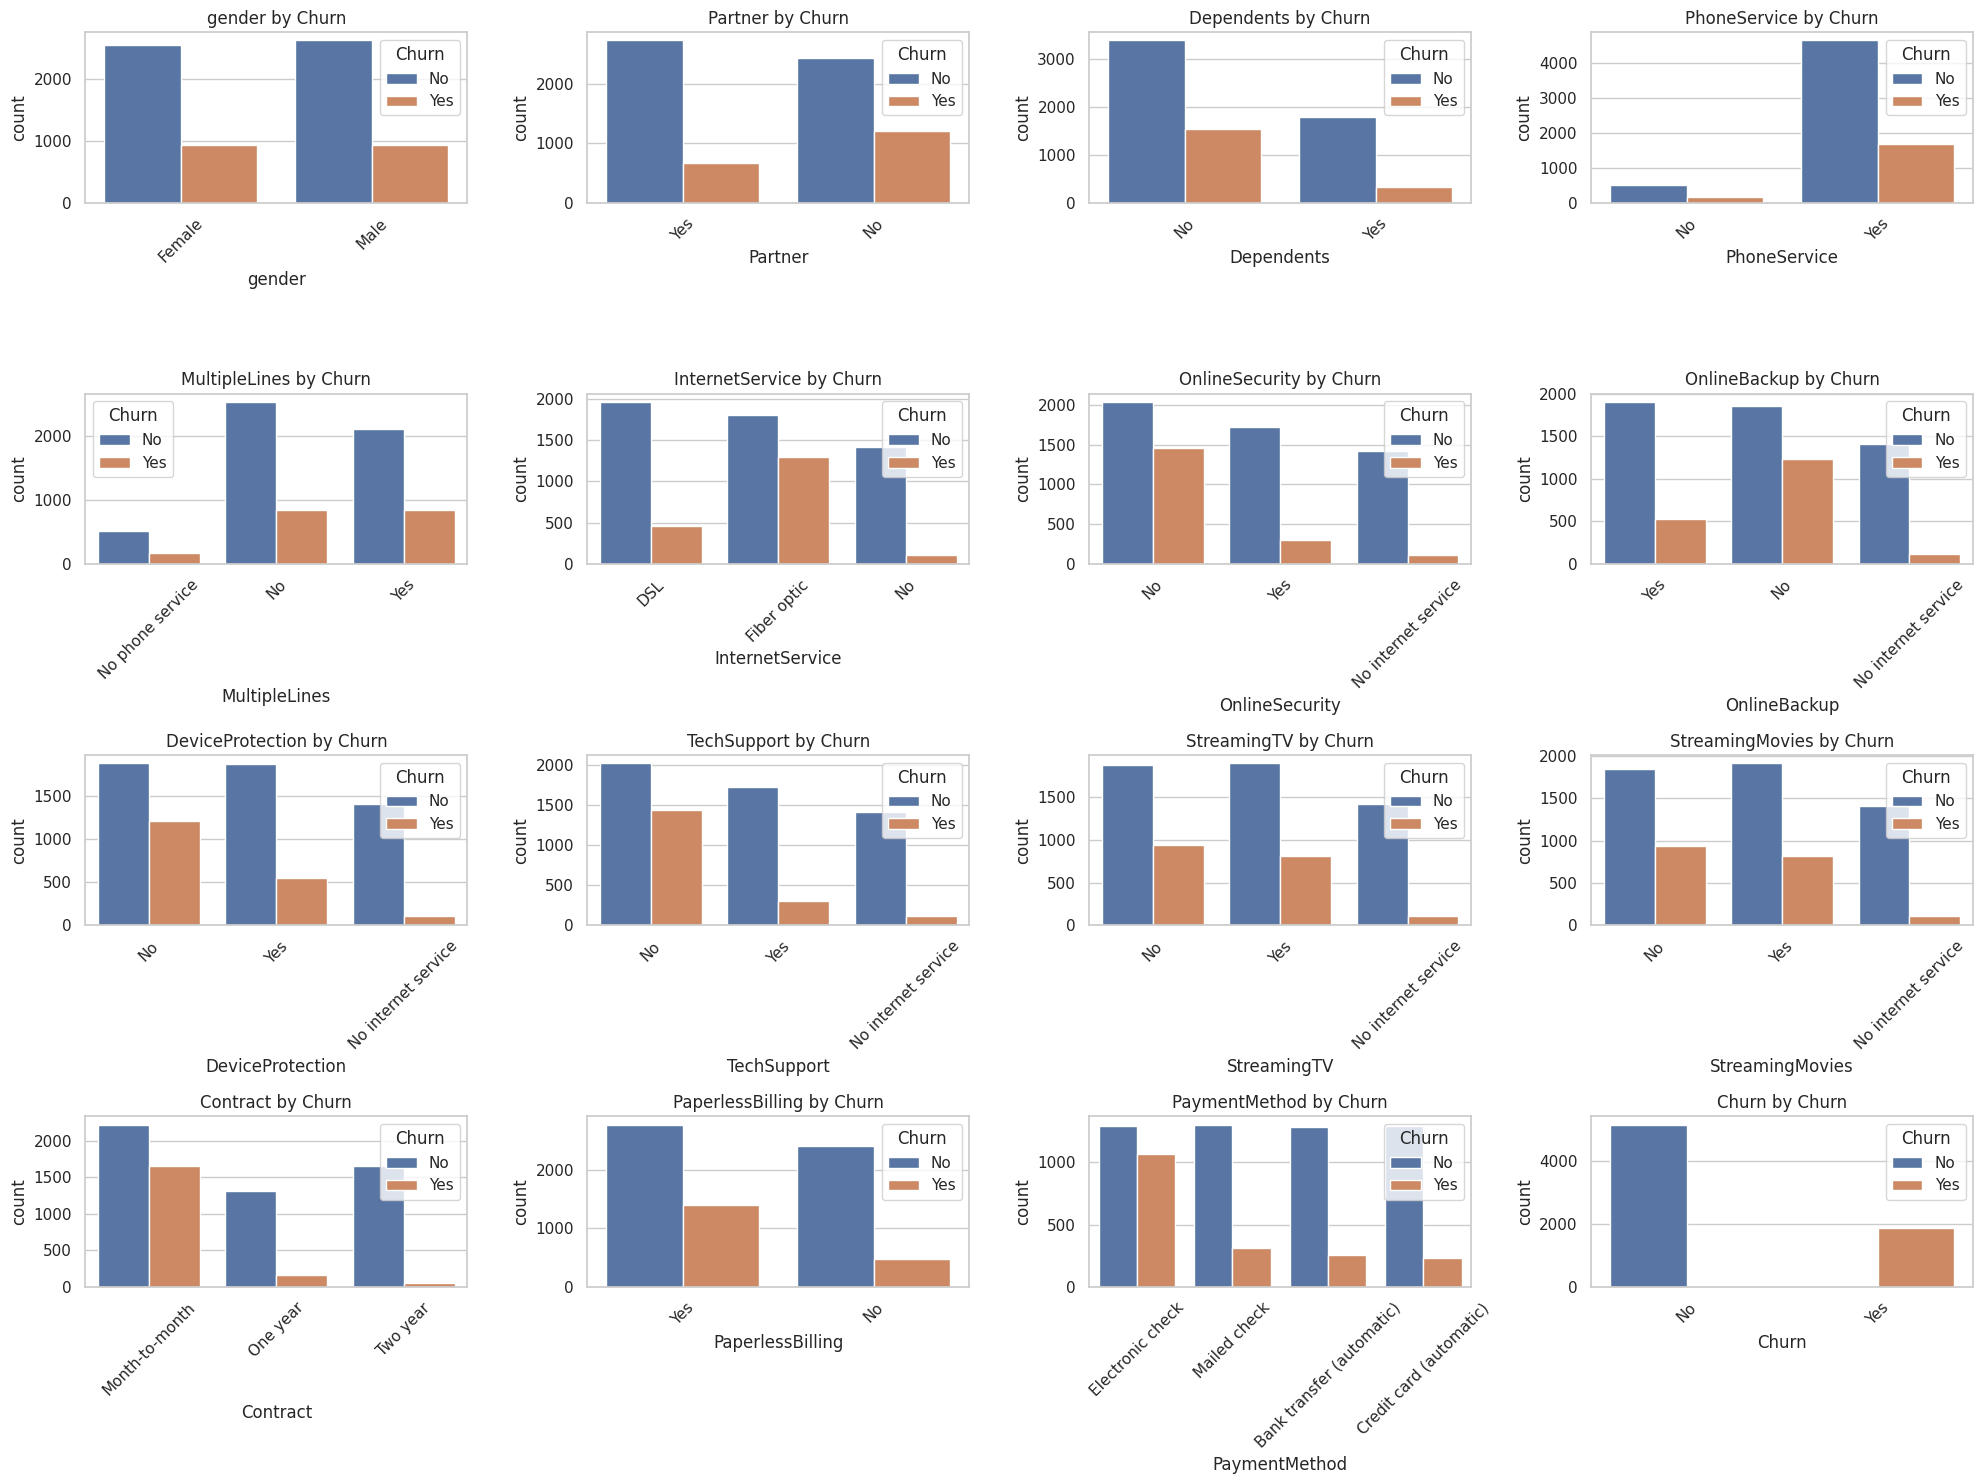

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns with less than 15 unique values (excluding 'SeniorCitizen' which is binary)
categorical_columns = [column for column in data.columns if data[column].nunique() < 15 and data[column].dtype == 'object']

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of categorical columns with respect to 'Churn'
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  # Create subplots for each categorical column
    sns.countplot(x=column, hue='Churn', data=data)
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


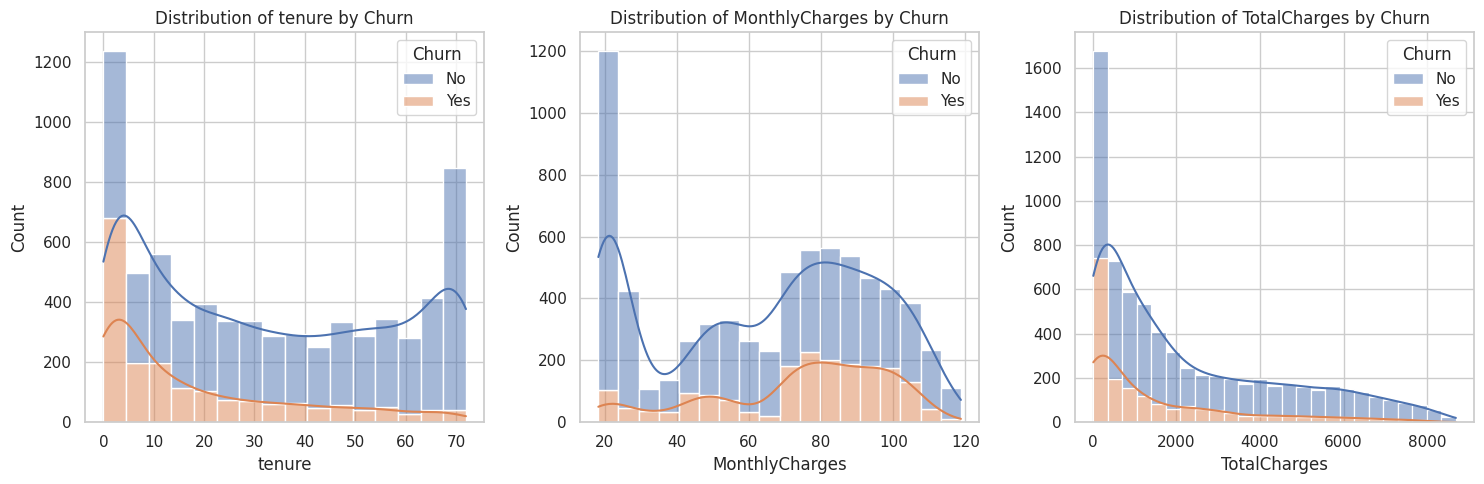

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Assuming 'TotalCharges' has been converted to numeric

# Plotting histograms for numerical columns with respect to churn
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=column, hue="Churn", multiple="stack", kde=True)
    plt.title(f'Distribution of {column} by Churn')

plt.tight_layout()
plt.show()


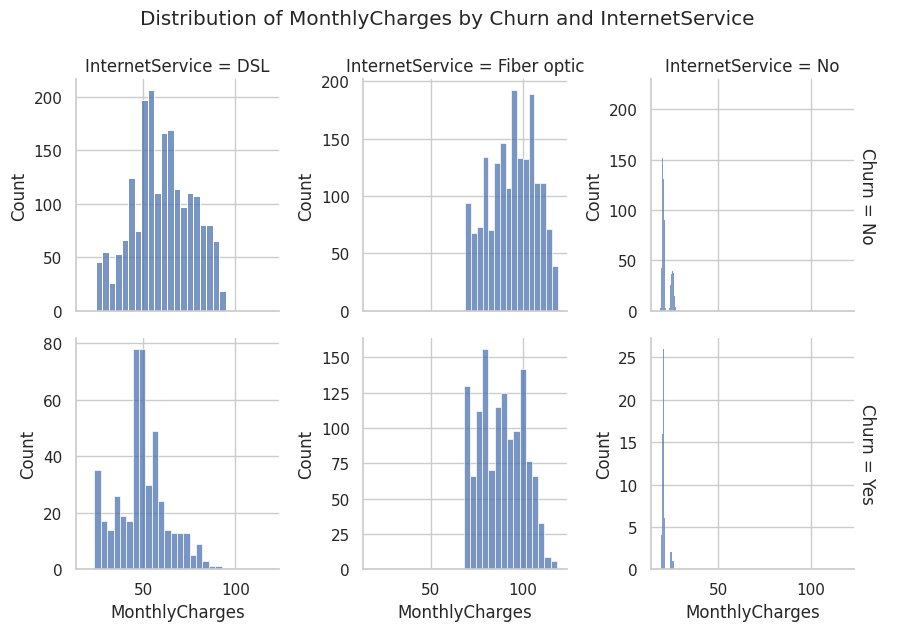

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with 'Churn' as the row and 'InternetService' as the column
g = sns.FacetGrid(data, row='Churn', col='InternetService', margin_titles=True, sharey=False)

# Map a histplot of 'MonthlyCharges' to each facet
g.map(sns.histplot, 'MonthlyCharges', kde=False)

# Add a title and adjust the layout
g.fig.suptitle('Distribution of MonthlyCharges by Churn and InternetService', y=1.05)
g.add_legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


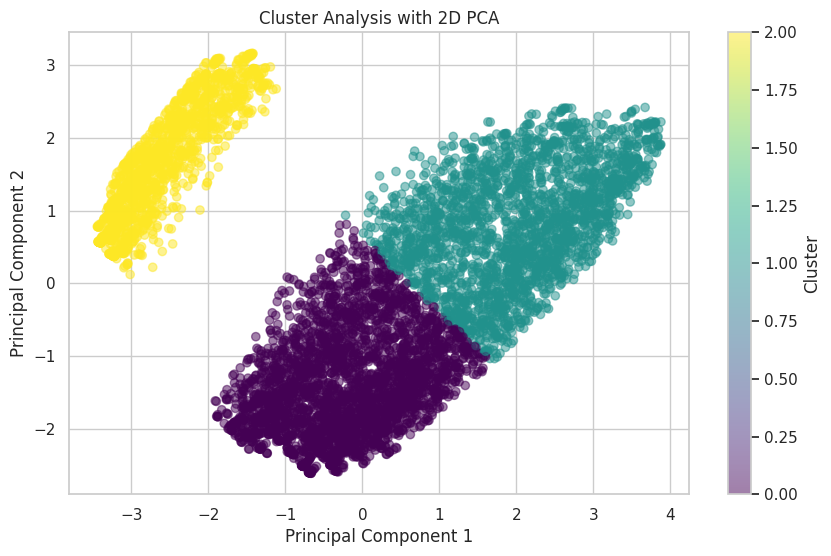

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame and 'customerID' has been removed

# Preprocessing numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Assuming 'TotalCharges' is numeric now
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values for 'TotalCharges'
    ('scaler', StandardScaler())
])

# Preprocessing categorical features
categorical_features = [col for col in data.columns if col not in numerical_features + ['customerID', 'Churn']]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a PCA instance to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)

# Create a KMeans instance with the number of clusters you determined
kmeans = KMeans(n_clusters=3, random_state=0)

# Create a pipeline that preprocesses the data, applies PCA and then KMeans
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca),
                           ('clusterer', kmeans)])

# Fit the pipeline to the data
pipeline.fit(data)

# Get the cluster assignments and PCA-transformed data
clusters = pipeline.named_steps['clusterer'].labels_
pca_data = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(data))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Cluster Analysis with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


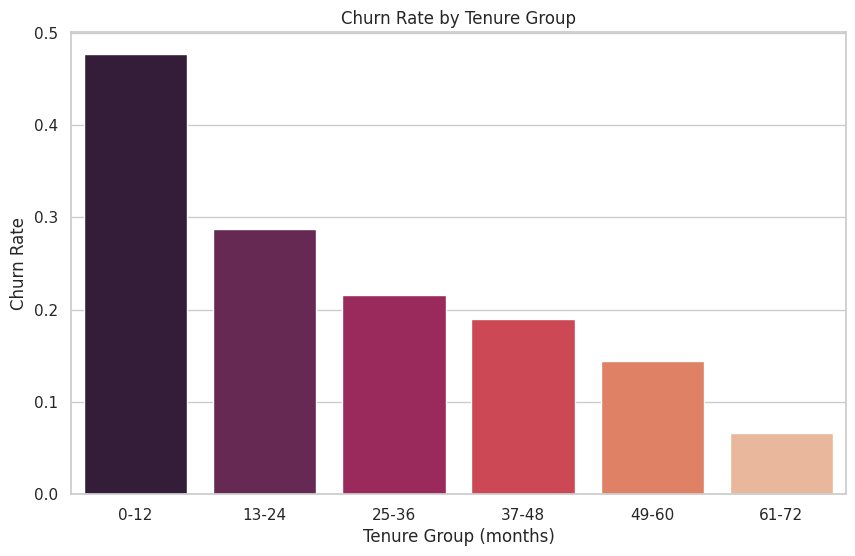

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and 'Churn' has been encoded as 0 or 1

# Create tenure group bins
tenure_bins = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
data['tenure_group'] = tenure_bins

# Calculate churn rate by tenure group
churn_rate_by_tenure = data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()['Yes']

# Plotting the churn rate by tenure group
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, palette="rocket")
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Churn Rate')
plt.show()


In [ ]:
# Creating tenure segments
bins = [0, 12, 24, 60, max(df_cleaned['tenure'])]
labels = ['0-1 year', '1-2 years', '2-5 years', '5+ years']
df_cleaned['TenureSegment'] = pd.cut(df_cleaned['tenure'], bins=bins, labels=labels, right=False)

# Analyzing churn rate and average monthly charges by tenure segment
tenure_churn_rate = df_cleaned.groupby('TenureSegment')['Churn'].value_counts(normalize=True).unstack().mul(100).round(2)
average_monthly_charges = df_cleaned.groupby('TenureSegment')['MonthlyCharges'].mean().round(2)


<ipython-input-11-b757365f74f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TenureSegment'] = pd.cut(df_cleaned['tenure'], bins=bins, labels=labels, right=False)


In [ ]:
def impute_mean_median(df, column, method='mean'):
    if method == 'mean':
        value = df[column].mean()
    else:  # 'median'
        value = df[column].median()
    return df[column].fillna(value)


In [ ]:
def impute_based_on_columns(df, column, factor_columns):
    product = df[factor_columns[0]] * df[factor_columns[1]]
    return df[column].fillna(product)


In [ ]:
from sklearn.linear_model import LinearRegression

def impute_regression(df, target_column, feature_columns):
    model = LinearRegression()
    not_null_data = df[df[target_column].notnull()]
    null_data = df[df[target_column].isnull()]

    model.fit(not_null_data[feature_columns], not_null_data[target_column])
    predicted_values = model.predict(null_data[feature_columns])

    df_imputed = df.copy()
    df_imputed.loc[df[target_column].isnull(), target_column] = predicted_values
    return df_imputed[target_column]
